# CREDIT CARD FRAUD DETECTION

### IMPORT THE NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold

In [2]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


### DATA INFORMATION

In [3]:
data.shape

(284807, 31)

In [4]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


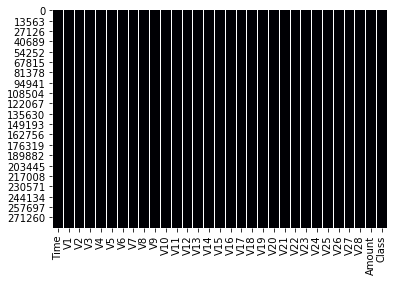

In [7]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False)

# DATA INSIGHTS

In [8]:
f = data[data['Class'] == 1]
nf = data[data['Class'] == 0]

### SUMMARY OF FRAUD CASES

In [9]:
f.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,...,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00
mean,80746.81,-4.77,3.62,-7.03,4.54,-3.15,-1.40,-5.57,0.57,-2.58,...,0.71,0.01,-0.04,-0.11,0.04,0.05,0.17,0.08,122.21,1.00
std,47835.37,6.78,4.29,7.11,2.87,5.37,1.86,7.21,6.80,2.50,...,3.87,1.49,1.58,0.52,0.80,0.47,1.38,0.55,256.68,0.00
min,406.00,-30.55,-8.40,-31.10,-1.31,-22.11,-6.41,-43.56,-41.04,-13.43,...,-22.80,-8.89,-19.25,-2.03,-4.78,-1.15,-7.26,-1.87,0.00,1.00
25%,41241.50,-6.04,1.19,-8.64,2.37,-4.79,-2.50,-7.97,-0.20,-3.87,...,0.04,-0.53,-0.34,-0.44,-0.31,-0.26,-0.02,-0.11,1.00,1.00
50%,75568.50,-2.34,2.72,-5.08,4.18,-1.52,-1.42,-3.03,0.62,-2.21,...,0.59,0.05,-0.07,-0.06,0.09,0.00,0.39,0.15,9.25,1.00
75%,128483.00,-0.42,4.97,-2.28,6.35,0.21,-0.41,-0.95,1.76,-0.79,...,1.24,0.62,0.31,0.29,0.46,0.40,0.83,0.38,105.89,1.00
max,170348.00,2.13,22.06,2.25,12.11,11.10,6.47,5.80,20.01,3.35,...,27.20,8.36,5.47,1.09,2.21,2.75,3.05,1.78,2125.87,1.00


### SUMMARY OF NON-FRAUD CASES

In [10]:
nf.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,...,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00
mean,94838.20,0.01,-0.01,0.01,-0.01,0.01,0.00,0.01,-0.00,0.00,...,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,88.29,0.00
std,47484.02,1.93,1.64,1.46,1.40,1.36,1.33,1.18,1.16,1.09,...,0.72,0.72,0.62,0.61,0.52,0.48,0.40,0.33,250.11,0.00
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-31.76,-73.22,-6.29,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54230.00,-0.92,-0.60,-0.88,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.65,0.00
50%,84711.00,0.02,0.06,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139333.00,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.05,0.00
max,172792.00,2.45,18.90,9.38,16.88,34.80,73.30,120.59,18.71,15.59,...,22.61,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,0.00


### FRAUDS vs NO FRAUDS

In [11]:
fraud = len(data[data['Class'] == 1])/len(data)*100
no_fraud = len(data[data['Class'] == 0])/len(data)*100
fraud_percentage = [fraud,no_fraud]

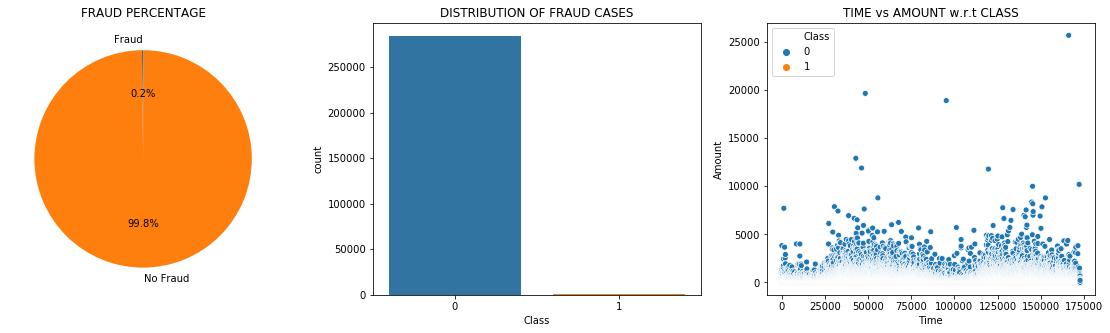

In [12]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (20,5))
plt.subplot(1,3,1)
plt.pie(fraud_percentage,labels = ['Fraud','No Fraud'],autopct='%1.1f%%',startangle = 90,)
plt.title('FRAUD PERCENTAGE')

plt.subplot(1,3,2)
sns.countplot('Class',data = data,)
plt.title('DISTRIBUTION OF FRAUD CASES')

plt.subplot(1,3,3)
sns.scatterplot('Time','Amount',data = data,hue = 'Class')
plt.title('TIME vs AMOUNT w.r.t CLASS')
plt.show()

### CLEARLY THE DATA IS UNBALANCED 
- THIS WILL BIAS OUR CLASSIFICATION RESULTS TOWARDS THE MAJORITY [NO FRAUDS]
- FOR BALACING THE DATA, WE HAVE 2 OPTIONS 

### 1] UNDERSAMPLING
- DECREASE THE MAJORITY DATA VALUES [NO FRAUDS]

### 2] OVERSAMPLING
- INCREASE THE MINORITY DATA VALUES [FRAUDS]

# FEATURE SELECTION

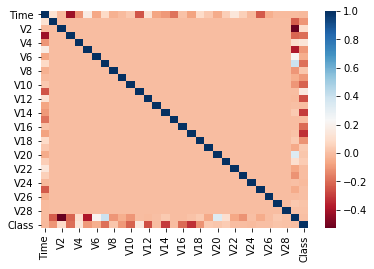

In [13]:
sns.heatmap(data.corr(),cmap = 'RdBu',cbar = True)

Text(0.5, 1, 'CORRELATION w.r.t CLASS')

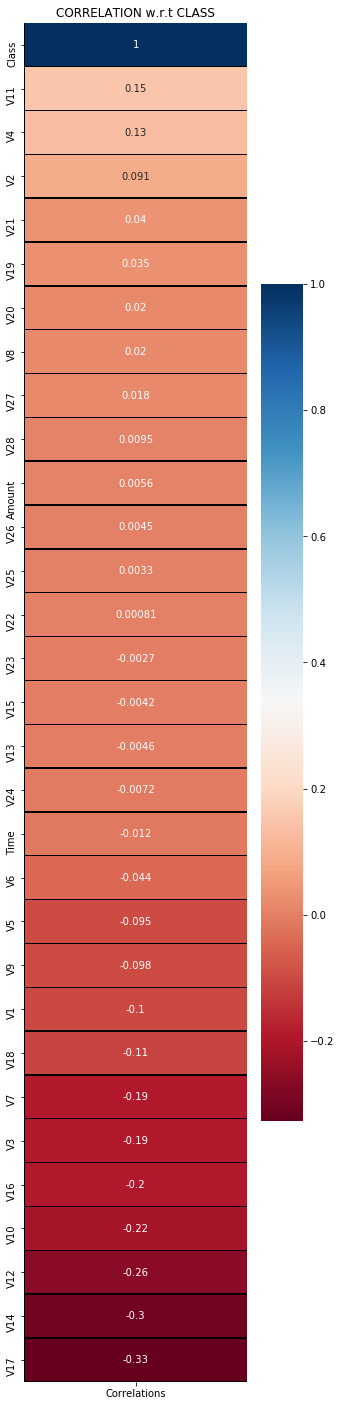

In [14]:
corr = data.corrwith(data['Class']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,25))
sns.heatmap(corr,annot = True,cmap = 'RdBu',linewidths = 0.4,linecolor = 'black')
plt.title('CORRELATION w.r.t CLASS')

- HEATMAP CANNOT BE USED IN THIS CASE BECAUSE OF THE NUMBER OF FEATURES
- WE USE A DIFFERENT KIND OF VISUALIZATION FOR PLOTTING THE CORRELATION PLOT
- A LOT OF FEATURES ARE NOT USEFUL FOR CLASSIFICATION FROM THE CORRELATION PLOT
- WE WILL EXCLUDE THE FEATURES HAVING VALUES IN THE RANGE [-0.1,0.1]
- 'V4','V11' ARE POSITIVELY CORRELATED & 'V7','V3','V16','V10','V12','V14','V17' ARE NEGATIVELY CORRELATED
- WE WILL SELECT THE ABOVE FEATURES FOR CLASSIFICATION PURPOSES

In [15]:
df = data[['V4','V11','V7','V3','V16','V10','V12','V14','V17','Class']]
df.head()

,V4,V11,V7,V3,V16,V10,V12,V14,V17,Class
0,1.38,-0.55,0.24,2.54,-0.47,0.09,-0.62,-0.31,0.21,0
1,0.45,1.61,-0.08,0.17,0.46,-0.17,1.07,-0.14,-0.11,0
2,0.38,0.62,0.79,1.77,-2.89,0.21,0.07,-0.17,1.11,0
3,-0.86,-0.23,0.24,1.79,-1.06,-0.05,0.18,-0.29,-0.68,0
4,0.40,-0.82,0.59,1.55,-0.45,0.75,0.54,-1.12,-0.24,0


# DATA BALANCING

### WE WILL USE THE COMBINATION OF UNDERSAMPLING & OVERSAMPLING
- WE WILL USE UNDERSAMPLING FIRST TO TRIM DOWN MAJORITY DATA VALUES 
- THEN WE WILL USE OVERSAMPLING MINORITY DATA VALUES TO BALANCE THE DATA

### IMBLEARN FOR OVERSAMPLING & UNDERSAMPLING
- PIP STATEMENT FOR INSTALLATION:- pip install imbalanced-learn

In [16]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

imblearn.__version__

'0.7.0'

# EVALUATION METRICS

- FOR IMBALANCED DATASETS, WE CANNOT USE THE TRADITIONAL METRIC LIKE ACCURACY.
- THIS IS BECAUSE THE DATA IS SKEWED TOWARDS THE MAJORITY CLASS AND THE MODEL WILL FAVOUR ITS PREDICTIONS TOWARDS MAJORITY CLASS.
- NOW AFTER RESAMPLING, WE HAVE DUPLICATED THE DATA AND ADDED NEW DATA POINTS.THUS USING ACCURACY WOULD BE MISLEADING TO EVALUATE THE MODEL.
- WE WILL USE THE CONFUSION MATRIX,ROC-AUC GRAPH AND ROC-AUC SCORE TO EVALUATE THE MODEL.
- ROC-AUC GIVES US THE RELATION ABOUT TRUE POSITIVE & FALSE POSITIVE RATE.
- WE WILL ALSO USE THE F1 SCORE,RECALL AND PRECISION.

In [17]:
def model(classifier):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("CROSS VALIDATION SCORE : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC SCORE : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    plot_roc_curve(classifier, x_test,y_test)
    plt.title('ROC_AUC_PLOT')
    plt.show()

In [18]:
def model_evaluation(classifier):
    
    # CONFUSION MATRIX
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    
    # CLASSIFICATION REPORT
    print(classification_report(y_test,classifier.predict(x_test)))

In [19]:
def grid_search_cv(classifier,hyperparameters):
    
    GSCV = GridSearchCV(classifier,hyperparameters,cv = 10)
    model = GSCV.fit(x_test,y_test)
    print(model)
    print('HIGHEST ACCURACY : ','{0:.2%}'.format(model.best_score_))
    print('BEST PARAMETERS : ',model.best_params_)

# MODELS

In [20]:
over = SMOTE(sampling_strategy= 0.5)
under = RandomUnderSampler(sampling_strategy = 0.1)
features = df.iloc[:,:9].values
target = df.iloc[:,9].values

In [21]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 2)

In [22]:
steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
x_train, y_train = pipeline.fit_resample(x_train, y_train)
Counter(y_train)

Counter({0: 4080, 1: 2040})

### POINTS TO REMEMBER:-
- THE REASON WE ARE USING SAMPLING ON THE TRAINING DATA IS IT WILL HELP THE MODEL TO LEARN BETTER TO IDENTIFY THE BOUNDARY. 
- USING THIS, WE DIFFERENTIATE THAT DATA CLEARLY AND HELPS IN MODEL LEARNING THE DIFFERENCES.
- TO CLASSIFY AND PERFORM BETTER ON TESTING DATA. 
- SAMPLING STRATEGY:- DESIRED RATIO OF NUMBER OF SAMPLES IN MINORITY CLASS OVER NUMBER OF SAMPLES IN MAJORITY CLASS AFTER RESAMPLING.
- UNDERSAMPLE:- DECREASES MAJORITY CLASS SAMPLES
- OVERSAMPLE:- INCREASES MINORITY CLASS SAMPLES

### 1] LOGISTIC REGRESSION:-

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2') 

CROSS VALIDATION SCORE :  98.03%
ROC_AUC SCORE :  93.48%


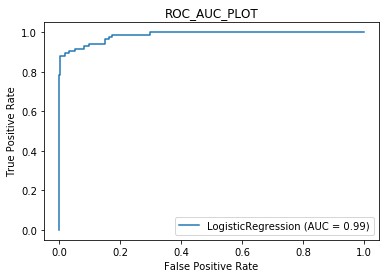

In [25]:
model(classifier_lr)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56878
           1       0.10      0.88      0.18        84

    accuracy                           0.99     56962
   macro avg       0.55      0.93      0.59     56962
weighted avg       1.00      0.99      0.99     56962



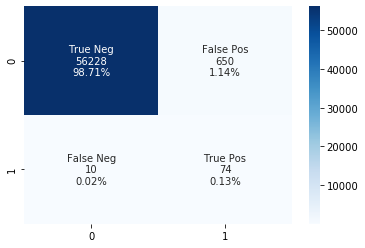

In [26]:
model_evaluation(classifier_lr)

### 2] SUPPORT VECTOR CLASSIFIER:-

In [27]:
from sklearn.svm import SVC

In [28]:
classifier_svc = SVC(kernel = 'linear',C = 0.1)

CROSS VALIDATION SCORE :  97.94%
ROC_AUC SCORE :  93.62%


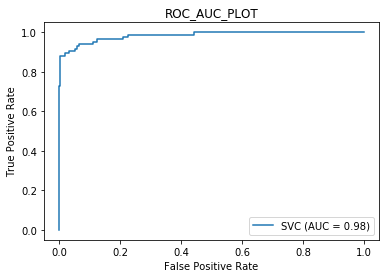

In [29]:
model(classifier_svc)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56878
           1       0.13      0.88      0.23        84

    accuracy                           0.99     56962
   macro avg       0.57      0.94      0.61     56962
weighted avg       1.00      0.99      0.99     56962



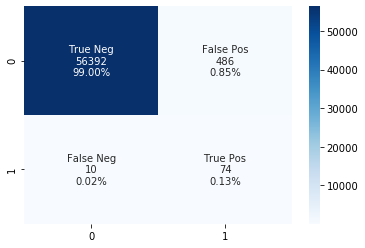

In [30]:
model_evaluation(classifier_svc)

### 3] DECISION TREE CLASSIFIER:- 

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

CROSS VALIDATION SCORE :  96.21%
ROC_AUC SCORE :  92.33%


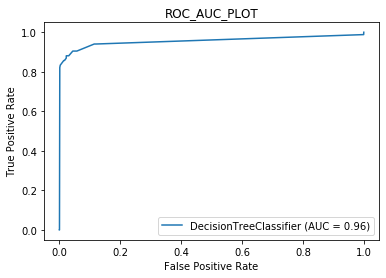

In [33]:
model(classifier_dt)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56878
           1       0.05      0.87      0.10        84

    accuracy                           0.98     56962
   macro avg       0.53      0.92      0.55     56962
weighted avg       1.00      0.98      0.99     56962



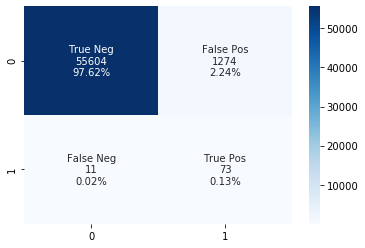

In [34]:
model_evaluation(classifier_dt)

### 4] RANDOM FOREST CLASSIFIER:- 

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

CROSS VALIDATION SCORE :  97.89%
ROC_AUC SCORE :  93.85%


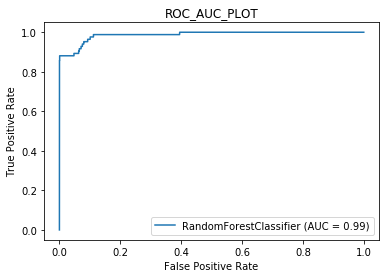

In [37]:
model(classifier_rf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56878
           1       0.24      0.88      0.38        84

    accuracy                           1.00     56962
   macro avg       0.62      0.94      0.69     56962
weighted avg       1.00      1.00      1.00     56962



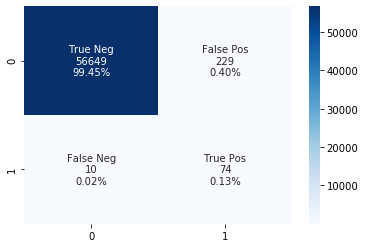

In [38]:
model_evaluation(classifier_rf)

### 5] K-NEAREST NEIGHBORS:-

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
classifier_knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)

CROSS VALIDATION SCORE :  99.29%
ROC_AUC SCORE :  93.71%


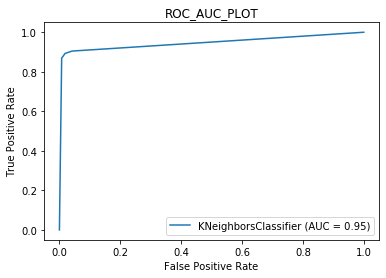

In [41]:
model(classifier_knn)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56878
           1       0.07      0.89      0.12        84

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.56     56962
weighted avg       1.00      0.98      0.99     56962



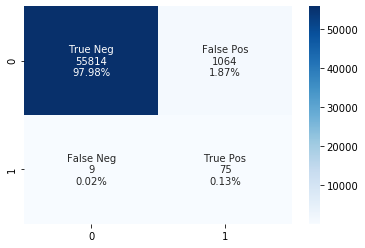

In [42]:
model_evaluation(classifier_knn)

# PLEASE UPVOTE IF YOU LIKE IT!
# STAY SAFE!